In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def vector_length(x):
    return np.sqrt(x@x)

In [3]:
def Golden_Section(f, a, b, epsilon):
    gamma = (1 + np.sqrt(5))/2  
    c = 1/gamma
    
    x = b - c*(b-a) # defining the x_0
    y = a + c*(b-a) # defining the y_0
    
    fx = f(x)       # defining the f(x_0)
    fy = f(y)       # defining the f(y_0)

    while abs(b-a) > epsilon:
        if fx > fy: 
            a = x
            x = y
            fx = fy 
            
            y = a + c*(b-a) 
            fy = f(y)
            
        else:
            b = y  
            y = x  
            fy = fx  
            
            x = b - c*(b-a)
            fx = f(x)
         
    return x

In [4]:
#the first function
def f1(x):
    return np.power(5*x[0]-x[1],4) + np.power(x[0]-2,2) + x[0] - 2*x[1] + 12
def df1(x):
    dx1 = 20*np.power(5*x[0]-x[1],3) + 2*(x[0]-2) + 1
    dx2 = -4*np.power(5*x[0]-x[1],3) - 2
    return np.array([dx1, dx2])
def H1(x):
    x1x1 = 300*np.power(5*x[0]-x[1],2) + 2
    x1x2 = x2x1 = -60*np.power(5*x[0]-x[1],2)
    x2x2 = 12*np.power(5*x[0]-x[1],2)
    return np.array([[x1x1,x1x2],
                     [x2x1,x2x2]])

#the second function
def f2(x):
    return 100*np.power(x[1]-np.power(x[0],2),2) + np.power(1-x[0],2)
def df2(x):
    dx1 = 400*(np.power(x[0],3) - x[0]*x[1]) + 2 * (x[0]-1)
    dx2 = 200*(x[1]-np.power(x[0],2))
    return np.array([dx1, dx2])
def H2(x):
    x1x1 = 400*(np.power(3*x[0],2) - x[1]) + 2
    x1x2 = x2x1 = -400*x[0]
    x2x2 = 200
    return np.array([[x1x1,x1x2],
                     [x2x1,x2x2]])

In [5]:
def DFP(f, df, x_0, epsilon, max_it_h = 100, max_it=100000):
    list_x = [x_0]    #hold x values
    list_fx = []      #hold f(x) values
    list_d = []       #hold directions
    list_alpha = []   #hold alpha values
    
    
    for it in range(max_it):
        
        if it % max_it_h == 0: ## time to reset hessian approximation
            A_k = np.array([[1,0],[0,1]])
            
        x = list_x[it]             #take new x from the previous iteration
        df_k = df(x)               #calculate the gradient of the function at x
        if vector_length(df_k) <= epsilon:
            break                  #stop when the gradient is close enough to zero
            
        d_k = -A_k @ df_k          #calculate the direction
        
        def f_line(a):
            return f(x+a*d_k)      #this function is for the exact line search below
        alpha = Golden_Section(f_line, -100, 100, epsilon*1e-1) #find the alpha that minimizes f_line
        
        x_new = x + alpha * d_k    #find new x
        s_k = alpha * d_k # x_new - x 
        q_k = df(x_new) 
        
        A_k = A_k + np.multiply.outer(s_k, s_k)/(s_k @ q_k) - np.multiply.outer((A_k @ q_k),(q_k @ A_k))/((q_k @ A_k) @ q_k)
        
        list_fx.append(f(x))       #calculate and store f(x)
        list_d.append(d_k)         #store direction 
        list_alpha.append(alpha)   #store alpha
        list_x.append(x_new)       #store new x

    output = pd.DataFrame({'x(k)':list_x[:-1],'f(x(k))':list_fx,'d(k)':list_d,'alpha(k)':list_alpha,'x(k+1)':list_x[1:]})
    return output, np.array(list_x)

In [15]:
output1,x1 = DFP(f1, df1, np.array([5,-10]), 0.0001)
output1

,x(k),f(x(k)),d(k),alpha(k),x(k+1)
0,"[5, -10]",1.500671e+06,"[-857507, 171502]",0.000007,"[-0.7433810088990622, -8.851319779560741]"
1,"[-0.7433810088990622, -8.851319779560741]",7.314518e+02,"[5.74338100889895, -1.1486802204393598]",-0.150029,"[-1.6050567921146612, -8.678984020000694]"
2,"[-1.6050567921146612, -8.678984020000694]",4.093195e+01,"[0.8616757832155599, -0.17233575956015557]",-0.000003,"[-1.605059373119627, -8.678983503797895]"
3,"[-1.605059373119627, -8.678983503797895]",4.093195e+01,"[2.5810043256749987e-06, -5.162028501974614e-07]",0.465181,"[-1.6050581724858868, -8.678983743925565]"
4,"[-1.6050581724858868, -8.678983743925565]",4.093195e+01,"[-1.2006337404280032e-06, 2.401276714414369e-07]",-0.009136,"[-1.6050581615171882, -8.678983746119313]"
...,...,...,...,...,...
596,"[6.49990624799177, 33.293310016602845]",-2.744055e+01,"[5.2894697262490095e-09, 2.8121560650224905e-08]",7.164424,"[6.499906285887774, 33.29331021807763]"
597,"[6.499906285887774, 33.29331021807763]",-2.744055e+01,"[-3.7896003360847995e-08, -2.0147478141819414e...",-2.322747,"[6.4999063739105845, 33.29331068605248]"
598,"[6.4999063739105845, 33.29331068605248]",-2.744055e+01,"[-8.802281029627115e-08, -4.679748493649494e-07]",0.297313,"[6.499906347740263, 33.293310546917496]"
599,"[6.499906347740263, 33.293310546917496]",-2.744055e+01,"[2.617032088085558e-08, 1.3913498025930338e-07]",-3.050564,"[6.499906267906015, 33.29331012247728]"


In [16]:
output1['x(k)'].tail(1).values[0]

array([ 6.49990627, 33.29331012])

In [17]:
f1(output1['x(k)'].tail(1).values[0])

-27.440550757041073

In [49]:
blue = np.array([0.,0.,1])
red = np.array([1.,0.,0.])
def color_gradient(n, c1=blue, c2=red):
    c = []
    for i in range(n):
        k = 1-i/n
        c.append(k*c1+(1-k)*c2)
    return np.array(c)

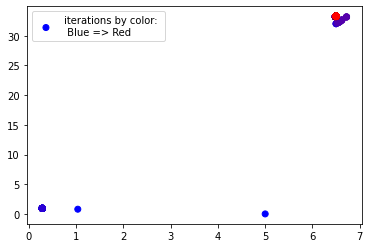

In [51]:
plt.scatter(x1[:,0], x1[:,1], c = color_gradient(x1.shape[0]), label='iterations by color: \n Blue => Red')
plt.legend(loc='upper left')

In [18]:
output2, x2 = DFP(f2,df2, np.array([1,-1]), 0.00001)
output2

,x(k),f(x(k)),d(k),alpha(k),x(k+1)
0,"[1, -1]",400.000000,"[-800, 400]",0.001545,"[-0.2358293922474577, -0.38208530387627115]"
1,"[-0.2358293922474577, -0.38208530387627115]",20.685474,"[1.2358293922470693, -0.6179146961244442]",-0.000043,"[-0.23588234516171283, -0.38205882741914354]"
2,"[-0.23588234516171283, -0.38205882741914354]",20.685474,"[5.295291339280084e-05, -2.647645715114777e-05]",0.005170,"[-0.23588207138971398, -0.3820589643051453]"
3,"[-0.23588207138971398, -0.3820589643051453]",20.685474,"[-2.7377324585131646e-07, 1.3688537947587065e-07]",-8.234888,"[-0.23587981689772003, -0.3820600915409026]"
4,"[-0.23587981689772003, -0.3820600915409026]",20.685474,"[-2.2544919886513526e-06, 1.1272357482994266e-06]",0.000964,"[-0.23587981907214953, -0.3820600904536977]"
...,...,...,...,...,...
99995,"[0.9852630794184378, 0.970960129419554]",0.000222,"[-1.6135587375780414e-10, -4.276404653568572e-10]",2.695519,"[0.9852630789835, 0.9709601282668407]"
99996,"[0.9852630789835, 0.9709601282668407]",0.000222,"[4.349379007992371e-10, 1.1527131991984074e-09]",-0.366610,"[0.9852630788240474, 0.9709601278442446]"
99997,"[0.9852630788240474, 0.9709601278442446]",0.000222,"[1.5945257581754385e-10, 4.2259616552658974e-10]",1.552810,"[0.985263079071647, 0.9709601285004561]"
99998,"[0.985263079071647, 0.9709601285004561]",0.000222,"[-2.475995797279751e-10, -6.56211529559414e-10]",-0.309651,"[0.9852630791483166, 0.970960128703653]"


In [20]:
f2(output2['x(k)'].tail(1).values[0])

0.00022187678142414935

In [19]:
plt.scatter(x2[:,0], x2[:,1], c = color_gradient(x2.shape[0]), label='iterations by color: Blue => Red')
plt.legend(loc='upper left')

NameError: name 'color_gradient' is not defined